<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week10_EOF_partVI_NAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install xarray
!pip install matplotlib
!pip install scipy
!pip install pandas

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [ ]:
!pip install eofs
from eofs.xarray import Eof
from eofs.examples import example_data_path

EOF analysis

/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


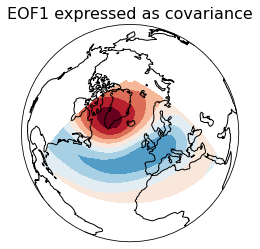

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path


# Read geopotential height data using the xarray module. The file contains
# December-February averages of geopotential height at 500 hPa for the
# European/Atlantic domain (80W-40E, 20-90N).
filename = example_data_path('hgt_djf.nc')
z_djf = xr.open_dataset(filename)['z']

# Compute anomalies by removing the time-mean.
z_djf = z_djf - z_djf.mean(dim='time')

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(z_djf.coords['latitude'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(z_djf, weights=wgts)

# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
eof1 = solver.eofsAsCovariance(neofs=1)

# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-75, 75, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
eof1[0, 0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('EOF1 expressed as covariance', fontsize=16)
plt.show()